In [51]:
# Importing libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression

### Question 1

1. Linear regression with one explanatory variable (20 points)

- Load in monthly house prices data in pounds sterling (£) from Jan 1991 to Dec 2016 from monthlyHousePricesUK.csv and the FTSE100 index from Yahoo Finance (ticker = ^FTSE) over the same period (01-Jan-1991 to 31-Dec-2016).✅

- a) Using the FTSE100 index monthly returns as dependent variable and the house prices monthly returns as explanatory variable, create a regression model with MATLAB/Python including a constant and calculate the correlation coefficient (5points)✅
- b) What do the results tell us? (5points) ✅
- c) Use a hypothesis test to back up your conclusion about the existence of a significant relationship between these two variables. (10 points) ✅


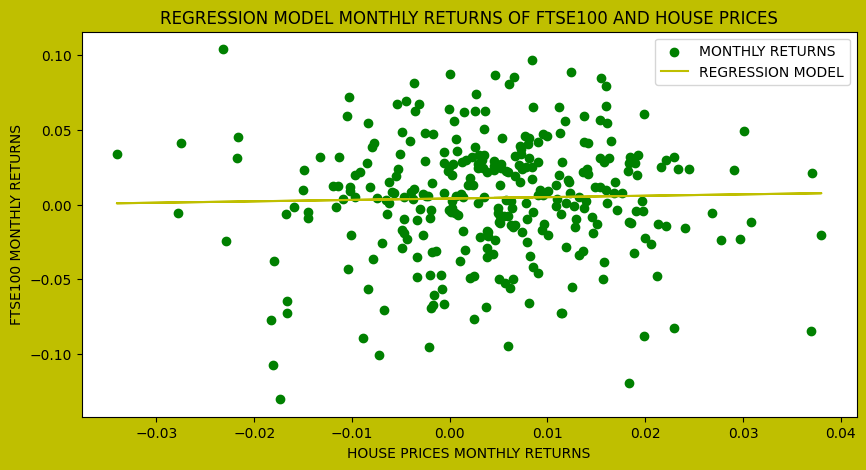

The slope: 0.09324142754349982
The correlation coefficient: 0.02655129570190995
The constant: 0.0040478376866624555
The p-value: 0.6409049000031647
The standard error: 0.19970586443555416


0           NaN
1      0.097037
2      0.031753
3      0.012090
4      0.005350
         ...   
307    0.017653
308    0.007771
309    0.035214
310   -0.009505
311   -0.023740
Name: Adj Close, Length: 312, dtype: float64

In [54]:
mHousePrice = pd.read_excel('Monthly.xls')     # Reading Monthly House Price data from excel file
ftse100 = pd.read_csv('FTSE100.csv')           # Reading FTSE100 data from excel file

mHousePriceRenamed = mHousePrice.rename(columns={'Unnamed: 0': 'Date'})           # Renaming the unnamed date field in house prices

# Extracting house price data for the period of (01-Jan-1991 to 31-Dec-2016) | No need for FTSE since its period is correct
mHousePrice19912016 = mHousePriceRenamed.loc[(mHousePriceRenamed['Date'] >= '1991-01-01') & (mHousePriceRenamed['Date'] <= '2016-12-31')]

ftse100['Date'] = pd.to_datetime(ftse100['Date']) # Converting to date time
ftse100Sorted = ftse100.sort_values(by = 'Date', ascending = True, ignore_index = True)    # Sorting the date to match the house prices data set

# MONTHLY RETURNS FOR FTSE100 AND HOUSE PRICES
ftse100MR = ftse100Sorted['Adj Close'].pct_change()
mHPMR = mHousePrice19912016['Average House Price'].pct_change()
y = pd.DataFrame(ftse100MR[1:])
x = pd.DataFrame(mHPMR[1:])

# CREATING A REGRESSION MODEL INCLUDING A CONSTANT
# https://realpython.com/linear-regression-in-python/

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(x, y)

# Make predictions using the testing set
prd = regr.predict(x)

# Plotting: Defining figure properties
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["figure.facecolor"] = "y"
plt.rcParams["figure.edgecolor"] = "r"
plt.title("REGRESSION MODEL MONTHLY RETURNS OF FTSE100 AND HOUSE PRICES")
plt.ylabel("FTSE100 MONTHLY RETURNS")
plt.xlabel("HOUSE PRICES MONTHLY RETURNS")

plt.scatter(x, y, color = 'g', label = 'MONTHLY RETURNS')
plt.plot(x, prd, color = 'y', label = 'REGRESSION MODEL')
plt.legend()
plt.show()

print('The slope:', slope)
print('The correlation coefficient:', rCC)
print('The constant:', yIntercept)
print('The p-value:', pVal)
print('The standard error:', stdErr)
ftse100MR
# b) What do the results tell us?
# - The correlation coefficient of 0.02655129570190995 shows a very weak positive relationship, can be said as no relationship
# - This tells us that this data of FTSE100 and House Prices can not be used for linear regression.

# c) Hypothesis test to back up the conclusion about the existence of a significant relationship between FTSE and house prices
# Ho: There is no relationship between FTSE100 and House Prices because 
#     - The correlation coefficient is too weak.
#     - The p-value of 0.6409049000031647 is greater then the significance level of 0.05.
#     - As the p-value > α, deviating from the null hypothesis is not statistically significant, therefore, Ho is not rejected

# A p-value less than 0.05 is typically considered to be statistically significant, in which case the null hypothesis should be rejected.
# A p-value greater than 0.05 means that deviation from the null hypothesis is not statistically significant, and the null hypothesis is not rejected.

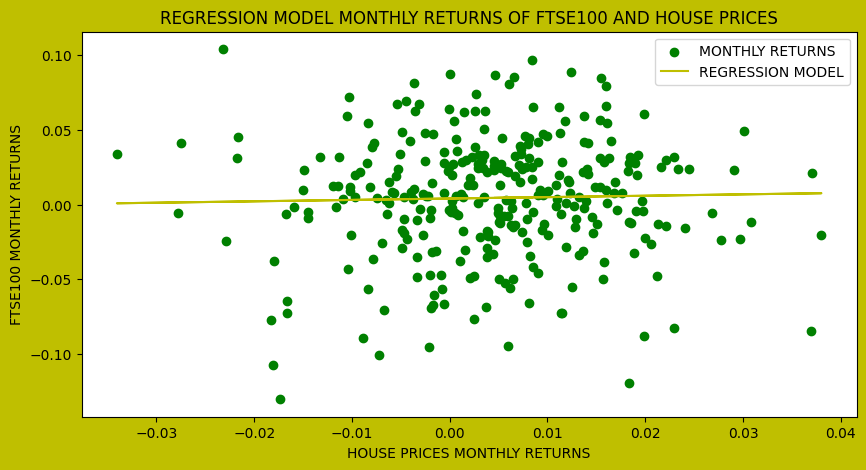

The slope: 0.09324142754349982
The correlation coefficient: 0.02655129570190995
The constant: 0.0040478376866624555
The p-value: 0.6409049000031647
The standard error: 0.19970586443555416


0           NaN
1      0.097037
2      0.031753
3      0.012090
4      0.005350
         ...   
307    0.017653
308    0.007771
309    0.035214
310   -0.009505
311   -0.023740
Name: Adj Close, Length: 312, dtype: float64

In [55]:
y = ftse100MR[1:]
x = mHPMR[1:]

# https://www.w3schools.com/python/python_ml_linear_regression.asp
# CREATING A REGRESSION MODEL INCLUDING A CONSTANT
slope, yIntercept, rCC, pVal, stdErr = stats.linregress(x, y)

def myfunc(x):
  return slope * x + yIntercept

theModel = list(map(myfunc, x))

# Plotting: Defining figure properties
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["figure.facecolor"] = "y"
plt.rcParams["figure.edgecolor"] = "r"
plt.title("REGRESSION MODEL MONTHLY RETURNS OF FTSE100 AND HOUSE PRICES")
plt.ylabel("FTSE100 MONTHLY RETURNS")
plt.xlabel("HOUSE PRICES MONTHLY RETURNS")

plt.scatter(x, y, color = 'g', label = 'MONTHLY RETURNS')
plt.plot(x, theModel, color = 'y', label = 'REGRESSION MODEL')
plt.legend()
plt.show()

print('The slope:', slope)
print('The correlation coefficient:', rCC)
print('The constant:', yIntercept)
print('The p-value:', pVal)
print('The standard error:', stdErr)
ftse100MR
# b) What do the results tell us?
# - The correlation coefficient of 0.02655129570190995 shows a very weak positive relationship, can be said as no relationship
# - This tells us that this data of FTSE100 and House Prices can not be used for linear regression.

# c) Hypothesis test to back up the conclusion about the existence of a significant relationship between FTSE and house prices
# Ho: There is relationship between FTSE100 and House Prices because 
#     - The correlation coefficient is too weak. https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html
#     - The p-value of 0.6409049000031647 is greater then the significance level of 0.05.
#     - As the p-value > α, deviating from the null hypothesis is not statistically significant, therefore, Ho is not rejected

# A p-value less than 0.05 is typically considered to be statistically significant, in which case the null hypothesis should be rejected.
# A p-value greater than 0.05 means that deviation from the null hypothesis is not statistically significant, and the null hypothesis is not rejected.

### Question 2

2. Linear regression with multiple explanatory variables (30 points)

- The college.csv file contains information about different US colleges and universities. 
- We are going to use the number of applications received, the number of enrolled students, the number of out of state students, the number of admitted students who were in the top 10% and number of admitted students who were in the top 25% of their class to predict the graduation rate.


- a) Calculate the correlation coefficients of the aforementioned variables. (5 points)
- b) Considering the graduation rate as the dependent variable, use stepwise to build the linear regression model. (5 points)
- c) Which predictor variables are useful in predicting the graduation rate? Explain how you got those variables. (5 points)
- d) Would the set of predictor variables be useful in predicting the graduation rate if you were to use BIC to select the model? Why? (5 points)
- e) Compare the accuracy of the model using only useful predictors with the accuracy of the model using all five predictors? (5 points)
- f) Given a set of predictors corresponding to Carnegie Mellon University, what graduation rate value should the most accurate model predict? (5 points)


In [1]:
college = pd.read_csv('college.csv')           # Reading US college data from csv file
collegeRenamed = college.rename(columns={'Unnamed: 0': 'Name'})           # Renaming the unnamed Name field in college
collegeX = collegeRenamed[['Name', 'Apps', 'Enroll', 'Outstate', 'Top10perc', 'Top25perc' ]]
collegeY = collegeRenamed[['Grad.Rate']]

# A) calculating the correlation between several variables in a Pandas DataFrame, you can simpy use the .corr() function.
corrCoff = collegeX.corr()
print("The correlation coefficients of the 5 variables is:\n\n", corrCoff)

# B) stepwise to build the linear regression model

NameError: name 'pd' is not defined

### Question 3

3. Open study (30 points)

- Design and undertake a study to assess a trend in the domain of transport for one or more countries of your choice. 
- Your study should be based on publicly available data and explained using mathematical facts. 
- Explain assumptions, methodology and findings. An example would be to study the relationship between increase in transport and road traffic accidents. The World Health Organization has data for road traffic deaths per country in 2010 and there is a World Bank indicator for Passenger cars (per 1000 people). 
- Can you predict the situation in 2021?


- Deliverables: You should turn in a report that includes the trend you are studying, the data source (5 points), your assumptions (5points), the methodology used along with its implementation in MATLAB/Python (10 points), and finally the findings and conclusions, which should be backed with code and figures (10 points).


### Question 4

4. Model Fitting and Prediction (20 points)

- The bank of Israel has published the data for unemployment rate (per 100 Israeli workforces) from 1980-12-31 to 2013-09-02. Download the data from Quandl (code: ODA/ISR_LUR) into MATLAB/Python. 
- Estimate the likely rate of unemployment by the year 2020 (10 points). 
- Explain how one can evaluate the accuracy of the estimate (5 points) and provide the accuracy as a percentage. (5 points)